# Capstone Project : 7 (Propensify)

### Submitted by: Shivam Kannoujia

#### Problem Statement :
Are you aware of what, when, and why your customers will make a purchase? 

Many businesses undertake an intense pursuit to discover these answers, dedicating valuable resources to data-driven campaigns
and high-cost strategies - yet the actual outcomes often remain elusive and disappointing.

Propensity modeling is a method that aims to forecast the chance that individuals, leads, and customers will engage in specific
actions. This method uses statistical analysis which takes into account all the independent and confounding factors that impact
customer behavior.

Suppose you are working for a company as a Data Scientist. Your company is commissioned by an insurance company to develop a
tool to optimize their marketing efforts.
#### This project is aimed at building a propensity model to identify potential customers.

#### Data:
The insurance company has provided with a historical dataset (train.csv). 
The company has also provided with a list of potential customers to whom to market (test.csv). From this list of potential customers,
you need to determine yes/no whether you wish to market to them. (Note: Ignore additional columns such as ‘profit’ and ‘id’ ).

# Importing Essential Libraries

In [3]:
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to regulate warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Read the dataset 

In [4]:
train_dataset = pd.read_excel(r"C:\Users\Shivam kannoujia\Desktop\Data Science Project\Capstone\Capstone_Shivam_Kannoujia_KH\train.xlsx")

test_dataset = pd.read_excel(r"C:\Users\Shivam kannoujia\Desktop\Data Science Project\Capstone\Capstone_Shivam_Kannoujia_KH\test.xlsx")

# Understand the dataset

In [3]:
# Get first 5 rows of the dataset

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

train_dataset.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [4]:
# Number of rows and columns in the dataset

train_dataset.shape

(8240, 24)

In [5]:
# Check for the datatype and basic information

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [6]:
# Check for the features in the dataset

train_dataset.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [8]:
# Generate descriptive statistics for numerical columns in the given dataset

train_dataset.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,930.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,77.709677,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,2881.768500,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-87622.112070,1.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.000000,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [11]:
# Combine the summaries into a single report for easy comparison
# Checking for missing values and data types
missing_values_train = train_dataset.isnull().sum()

summary_train_dataset = pd.DataFrame({
    "Data Type": train_dataset.dtypes,
    "Total Values": train_dataset.shape[0],
    "Missing Values": missing_values_train,
    "Unique Values": train_dataset.nunique()
})

summary_train_dataset

,Data Type,Total Values,Missing Values,Unique Values
custAge,float64,8240,2016,72
profession,object,8240,2,12
marital,object,8240,2,4
schooling,object,8240,2408,8
default,object,8240,2,3
housing,object,8240,2,3
loan,object,8240,2,3
contact,object,8240,2,2
month,object,8240,2,10
day_of_week,object,8240,789,5


In [12]:
# Dropping the additional columns available other than the columns mentioned in the project description.

train_dataset.drop(['profit','id'],axis=1,inplace=True)

# Delete the last two rows as it has only null values
train_dataset= train_dataset.iloc[:-2]

In [13]:
# Shape of the dataset after dropping the additional columns

train_dataset.shape

(8238, 22)

# Exploratory Data Analysis (EDA)

In [15]:
# No.of class and its counts in the dataset

train_dataset.responded.value_counts()

responded
no     7310
yes     928
Name: count, dtype: int64

There is majority number of records for -ve response than the +ve response.

In [18]:
# Relative freq of unique values in the target column

train_dataset.responded.value_counts(normalize=True)

responded
no     0.887351
yes    0.112649
Name: proportion, dtype: float64

The target variable is imbalanced. Approx.88% belong to 'no' category and only 11% belong to 'yes' category.

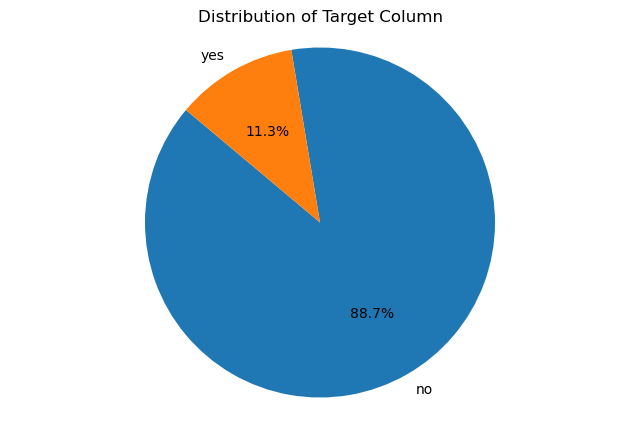

In [19]:
# Plot the target variable % values on pie chart.

responded_counts = train_dataset['responded'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,5))
plt.pie(responded_counts, labels=responded_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circ

# Save the plot as PNG file
plt.savefig('1.Distribution_of_Target_Class.png') 
plt.show()

Majority of records belongs to class 'no' than the class 'yes'.

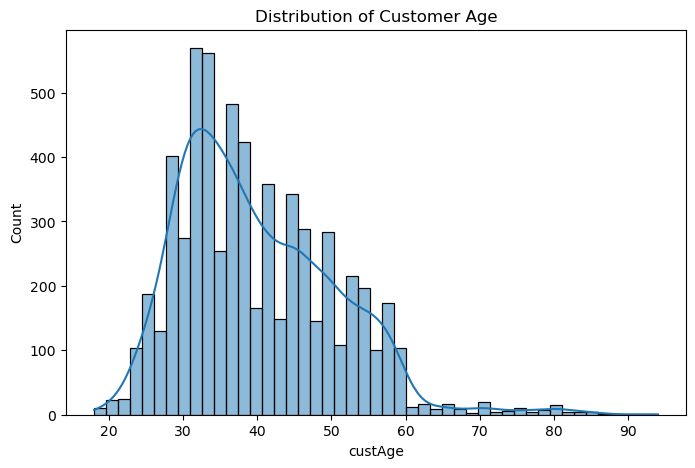

In [20]:
# Plot a histogram with KDE for the 'custAge' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,kde=True,x= 'custAge')
plt.title('Distribution of Customer Age')

# Save the plot as PNG file
plt.savefig('2.Distribution of Customer Age.png') 
plt.show()


The 'custAge' feature varies from 18 to 94. It doed not follow the normal distribution.

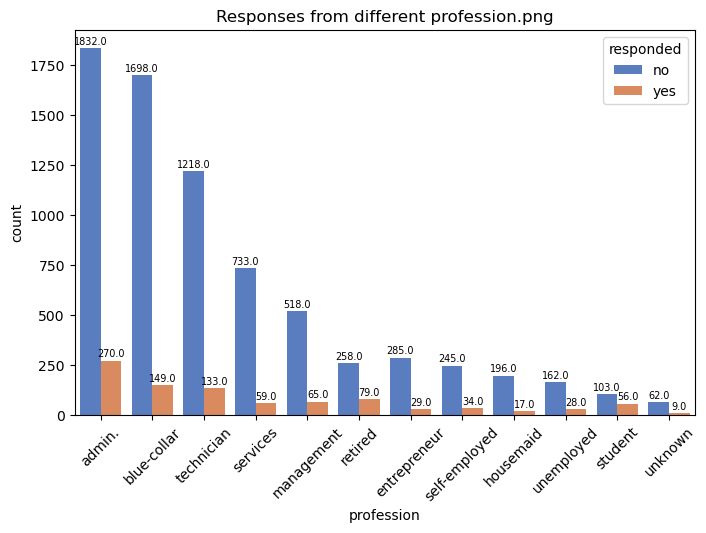

In [21]:
# Plot a countplot for the 'profession' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'profession',hue='responded',palette='muted',order=train_dataset['profession'].value_counts().index)
plt.xticks(rotation=45)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Responses from different profession.png')

# Save the plot as PNG file
plt.savefig('3.Response_from_different_profession.png')
plt.show()

The customer with the profession 'admin' has more +ve response than other professions.

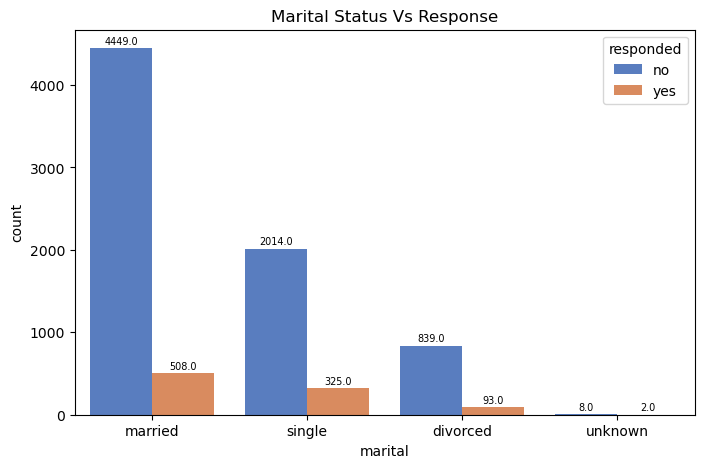

In [22]:
# Plot a countplot for the 'marital' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'marital',hue='responded',palette='muted',order=train_dataset['marital'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Marital Status Vs Response')

# Save the plot as PNG file
plt.savefig('4.Marital_status_plot.png')
plt.show()

The 'married' customers have given more positive response than single or divorced.

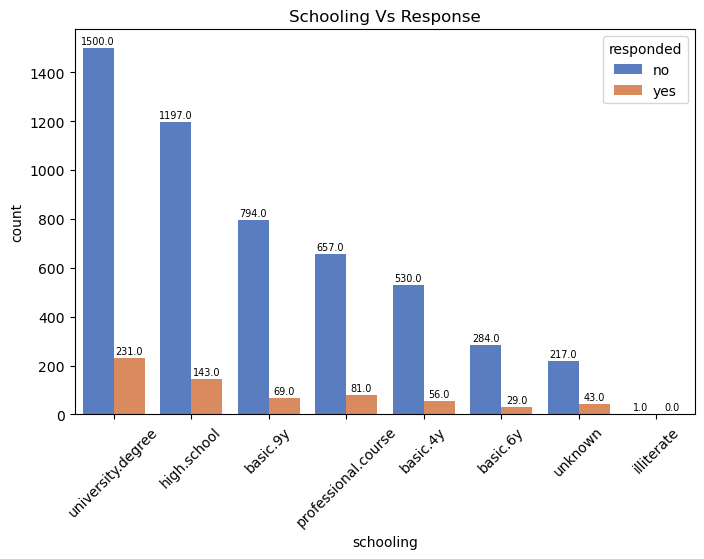

In [23]:
# Plot a countplot for the 'schooling' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'schooling',hue='responded',palette='muted',order=train_dataset['schooling'].value_counts().index)
plt.xticks(rotation=45)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Schooling Vs Response')

# Save the plot as PNG file
plt.savefig('5.Schooling_plot.png')
plt.show()

The 'university.degree' education level has more number of positive response than other levels.

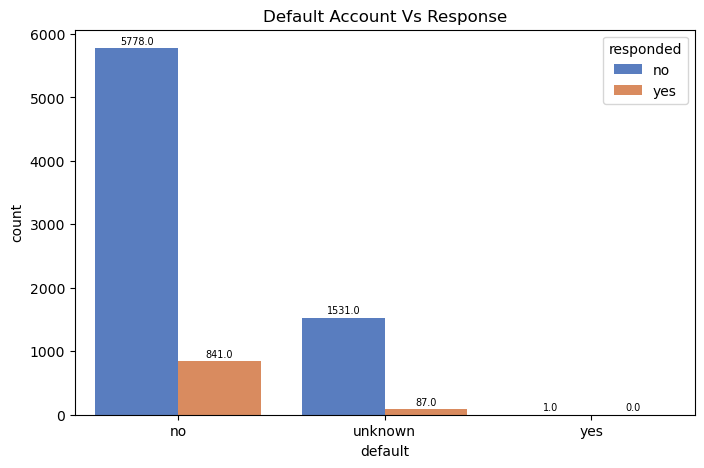

In [24]:
# Plot a countplot for the 'default' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'default',hue='responded',palette='muted',order=train_dataset['default'].value_counts().index)


# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Default Account Vs Response')

# Save the plot as PNG file
plt.savefig('6.default_account_plot.png')
plt.show()

More number of positive response from the customers who doesn't have defaulted account

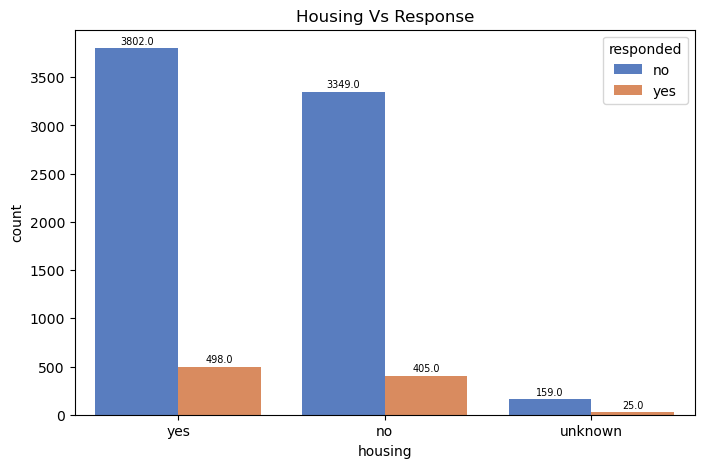

In [25]:
# Plot a countplot for the 'housing' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'housing',hue='responded',palette='muted',order=train_dataset['housing'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Housing Vs Response')

# Save the plot as PNG file
plt.savefig('7.Housing_plot.png')
plt.show()

The parameter of owning house loan has no significant impact on the responses.

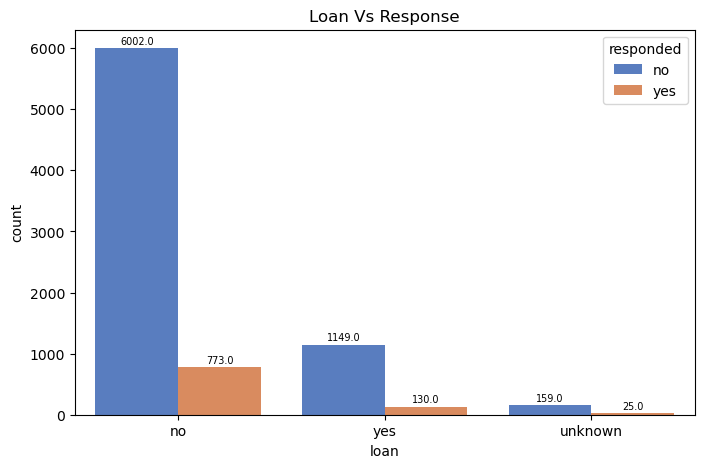

In [26]:
# Plot a countplot for the 'loan' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'loan',hue='responded',palette='muted',order=train_dataset['loan'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')
plt.title('Loan Vs Response')

# Save the plot as PNG file
plt.savefig('8.Loan_plot.png')
plt.show()

There is no significant inference that can be derived from the above graph between owning the personal loan and their responses.
However there is more number of positive reponses from the customers who doesn't have personal loan.

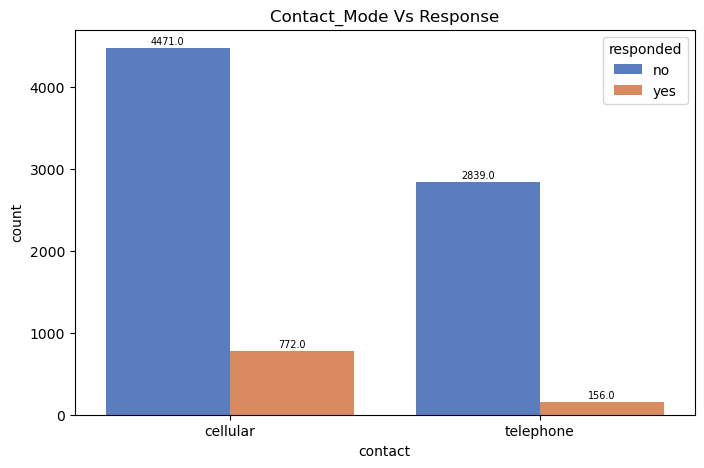

In [27]:
# Plot a countplot for the 'contact' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'contact',hue='responded',palette='muted',order=train_dataset['contact'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Contact_Mode Vs Response')

# Save the plot as PNG file
plt.savefig('9.Contact_Mode.png')
plt.show()

The cellular communication seems to be more effective than the telephone.

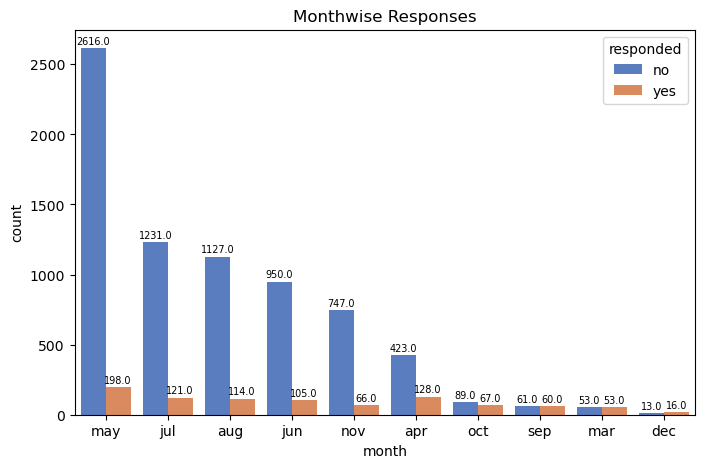

In [28]:
# Plot a countplot for the 'month' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'month',hue='responded',palette='muted',order=train_dataset['month'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Monthwise Responses')

# Save the plot as PNG file
plt.savefig('10.Month_plot.png')
plt.show()

The positive responses from the customers remains almost equal in all months. However there are no records for January and February months May month has more number of positive responses.

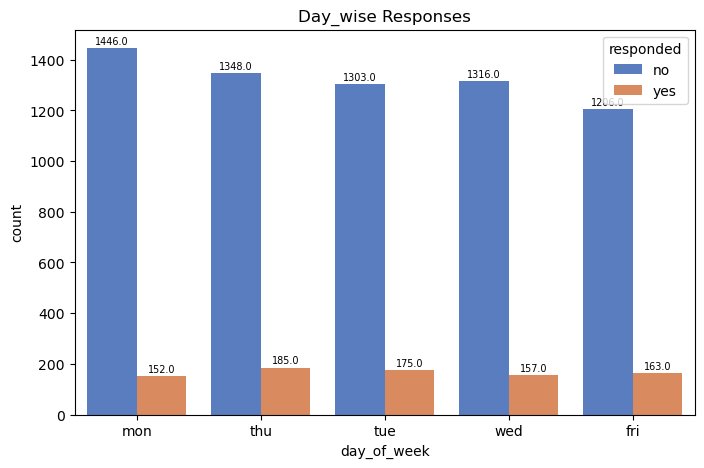

In [29]:
# Plot a countplot for the 'day_of_week' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'day_of_week',hue='responded',palette='muted',order=train_dataset['day_of_week'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Day_wise Responses')

# Save the plot as PNG file
plt.savefig('11.day_of_week_plot.png')
plt.show()

The +ve responses from the customers remains almost equal in all days of the week.

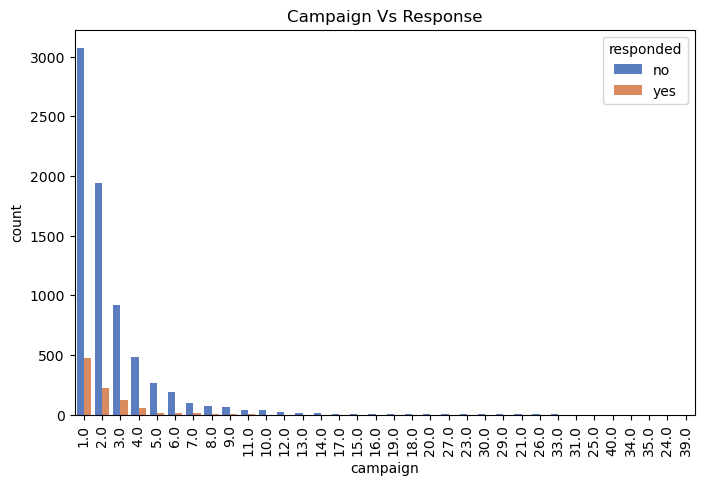

In [30]:
# Plot a countplot for the 'campaign' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'campaign',hue='responded',palette='muted',order=train_dataset['campaign'].value_counts().index)

plt.title('Campaign Vs Response')
plt.xticks(rotation=90)

# Save the plot as PNG file
plt.savefig('12.Campaign_plot.png')
plt.show()

As the number of times the customer contacted increases,the positive responses from the customer decreases.

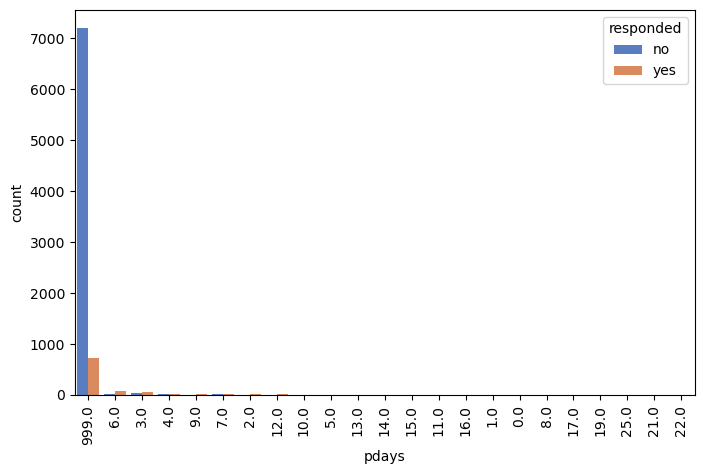

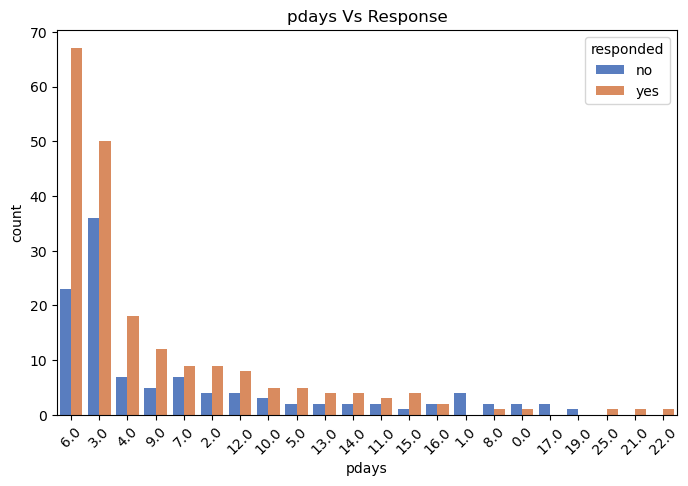

In [31]:
# Plot a countplot for the 'pdays' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'pdays',hue='responded',palette='muted',order=train_dataset['pdays'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(8,5))
temp_df = train_dataset[train_dataset['pdays']!=999]
sns.countplot(x='pdays',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pdays'].value_counts().index)
plt.xticks(rotation = 45)

plt.title('pdays Vs Response')

# Save the plot as PNG file
plt.savefig('13.pdays_plot.png')
plt.show()

After ignoring the customers who were not previously contacted,there are more number of 'yes' responses when the customer is contacted around 6 days after the previous campaign.

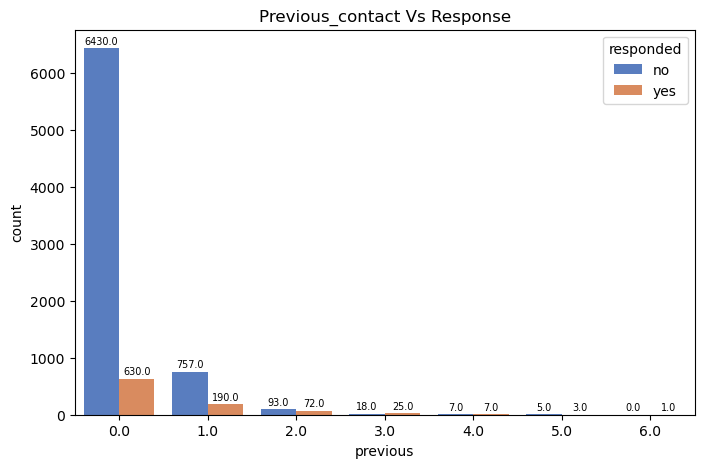

In [32]:
# Plot a countplot for the 'previous' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'previous',hue='responded',palette='muted')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')


plt.title('Previous_contact Vs Response')

# Save the plot as PNG file
plt.savefig('14.previous_plot.png')
plt.show()

There is no significant relation obtained from the graph between the customer responses and number of previous contacts performed before this campaign.

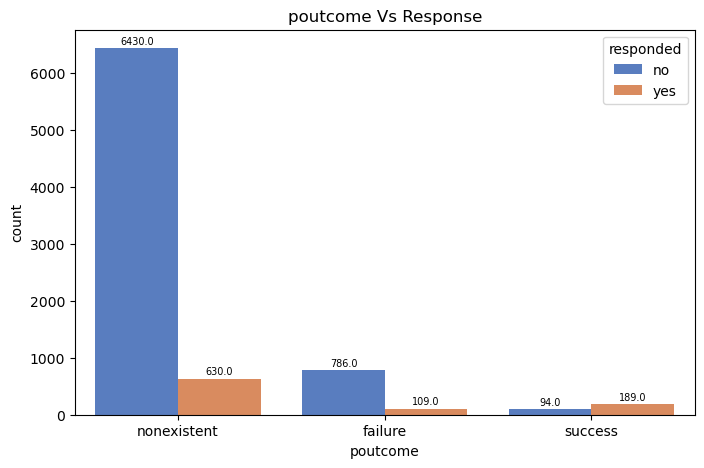

In [33]:
# Plot a countplot for the 'poutcome' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'poutcome',hue='responded',palette='muted')


# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('poutcome Vs Response')

# Save the plot as PNG file
plt.savefig('15.poutcome_plot.png')
plt.show()

There is more number of positive responses than negative responses from the customer when the outcome of the previous marketing marketing campaign is 'Success'

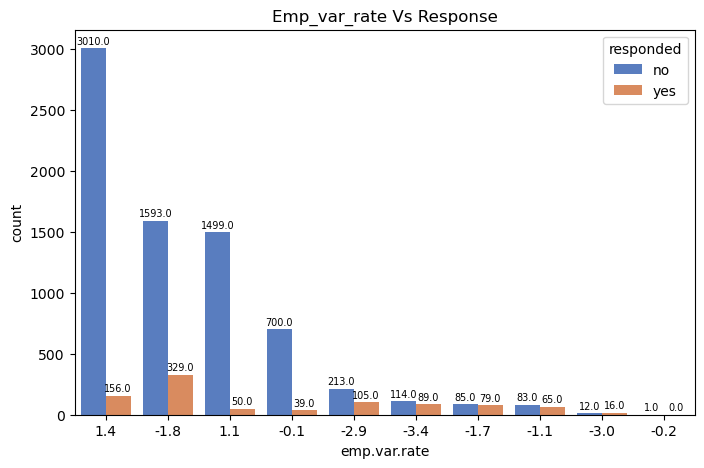

In [34]:
# Plot a countplot for the 'emp.var.rate' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'emp.var.rate',hue='responded',palette='muted',order=train_dataset['emp.var.rate'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Emp_var_rate Vs Response')

# Save the plot as PNG file
plt.savefig('16.emp_var_rate_plot.png')
plt.show()

When the employment variation rate is around -3, there are more positive responses than the negative response from the customers.

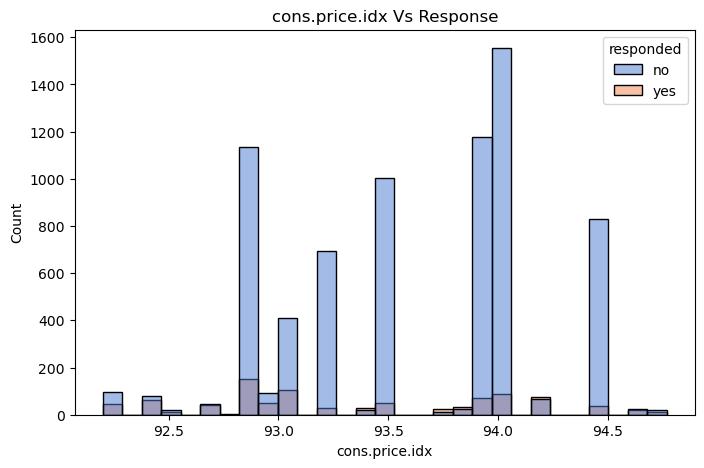

In [35]:
# Plot a countplot for the 'cons.price.idx' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,x= 'cons.price.idx',hue='responded',palette='muted')
plt.title('cons.price.idx Vs Response')

# Save the plot as PNG file
plt.savefig('17.cons_price_idx.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and consumer price index.

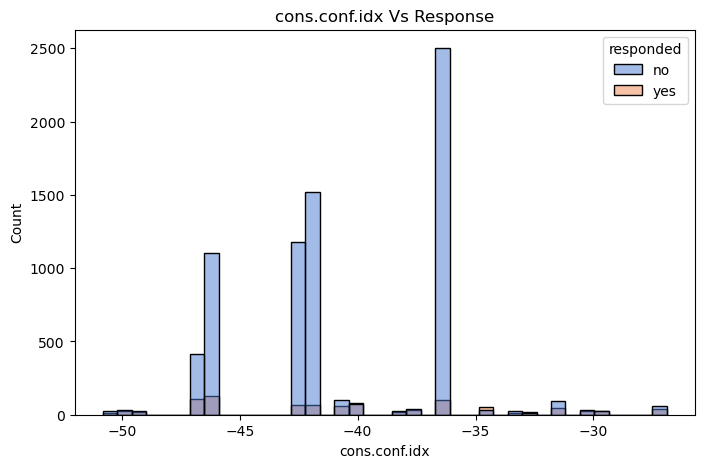

In [36]:
# Plot a countplot for the 'cons.conf.idx' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,x= 'cons.conf.idx',hue='responded',palette='muted')
plt.title('cons.conf.idx Vs Response')

# Save the plot as PNG file
plt.savefig('18.cons_conf_idx.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and consumer confidence index.

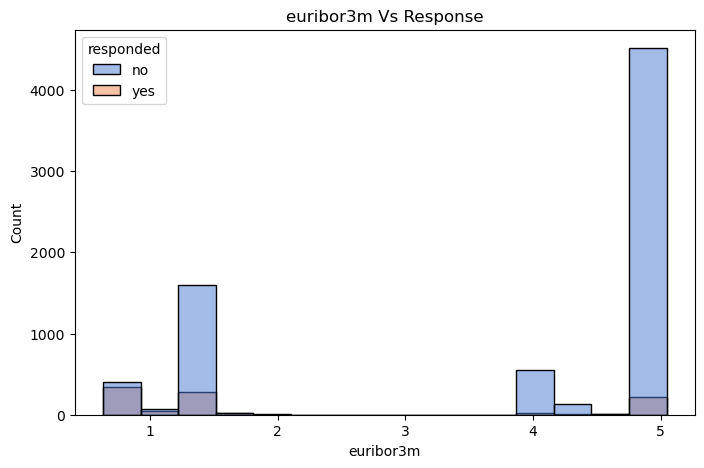

In [37]:
# Plot a histplot for the 'euribor3m' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,x= 'euribor3m',hue='responded',palette='muted')
plt.title('euribor3m Vs Response')

# Save the plot as PNG file
plt.savefig('19.euribor3m.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and euribor 3 month rate.

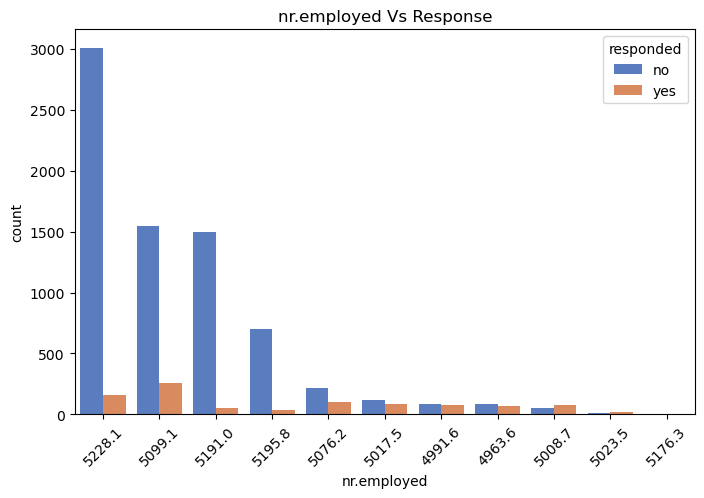

In [38]:
# Plot a countplot for the 'nr.employed' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'nr.employed',hue='responded',palette='muted',order=train_dataset['nr.employed'].value_counts().index)
plt.xticks(rotation=45)
plt.title('nr.employed Vs Response')

# Save the plot as PNG file
plt.savefig('20.nr_employed.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and number of employees.

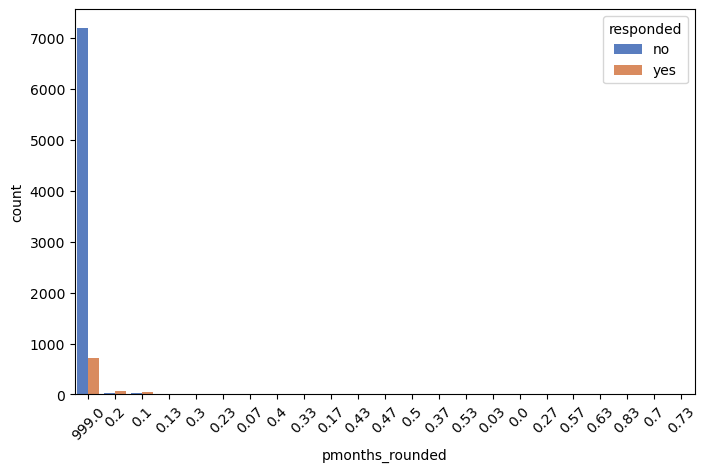

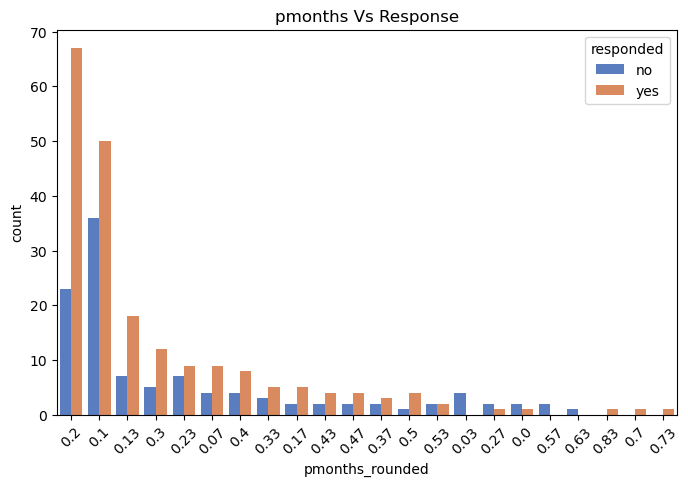

In [39]:
# Plot a countplot for the 'pmonths' column.

plt.figure(figsize=(8,5))
temp_df = train_dataset.copy()
# Round the values in the 'pmonths' column to 2 decimals
temp_df['pmonths_rounded'] = temp_df['pmonths'].round(2)
sns.countplot(x='pmonths_rounded',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pmonths_rounded'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(8,5))
temp_df = train_dataset[train_dataset['pmonths']!=999]
# Round the values in the 'pmonths' column to 2 decimals
temp_df['pmonths_rounded'] = temp_df['pmonths'].round(2)
sns.countplot(x='pmonths_rounded',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pmonths_rounded'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('pmonths Vs Response')

# Save the plot as PNG file
plt.savefig('21.pmonths.png')
plt.show()

After ignoring the customers who were not previously contacted,there are more number of positive responses when the customer is contacted around .2 months from the previous campaign.

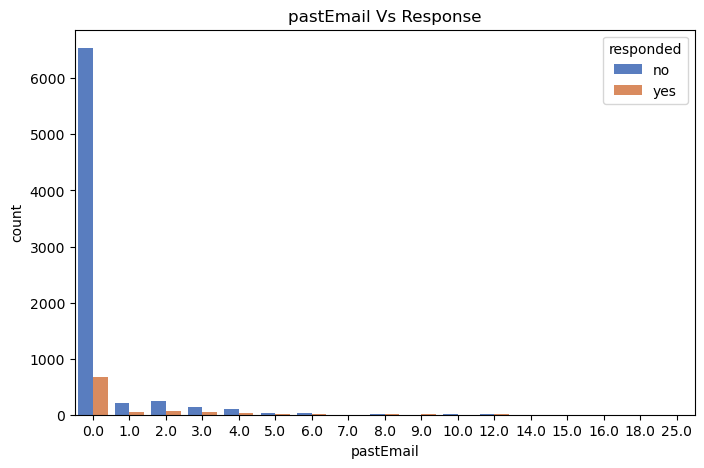

In [40]:
# Plot a countplot for the 'pastEmail' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'pastEmail',hue='responded',palette ='muted')
plt.title('pastEmail Vs Response')

# Save the plot as PNG file
plt.savefig('22.pastEmail.png')
plt.show()

Inspite of the increase in the number of previous email sent to customer,the positive responses from the customer decreases.

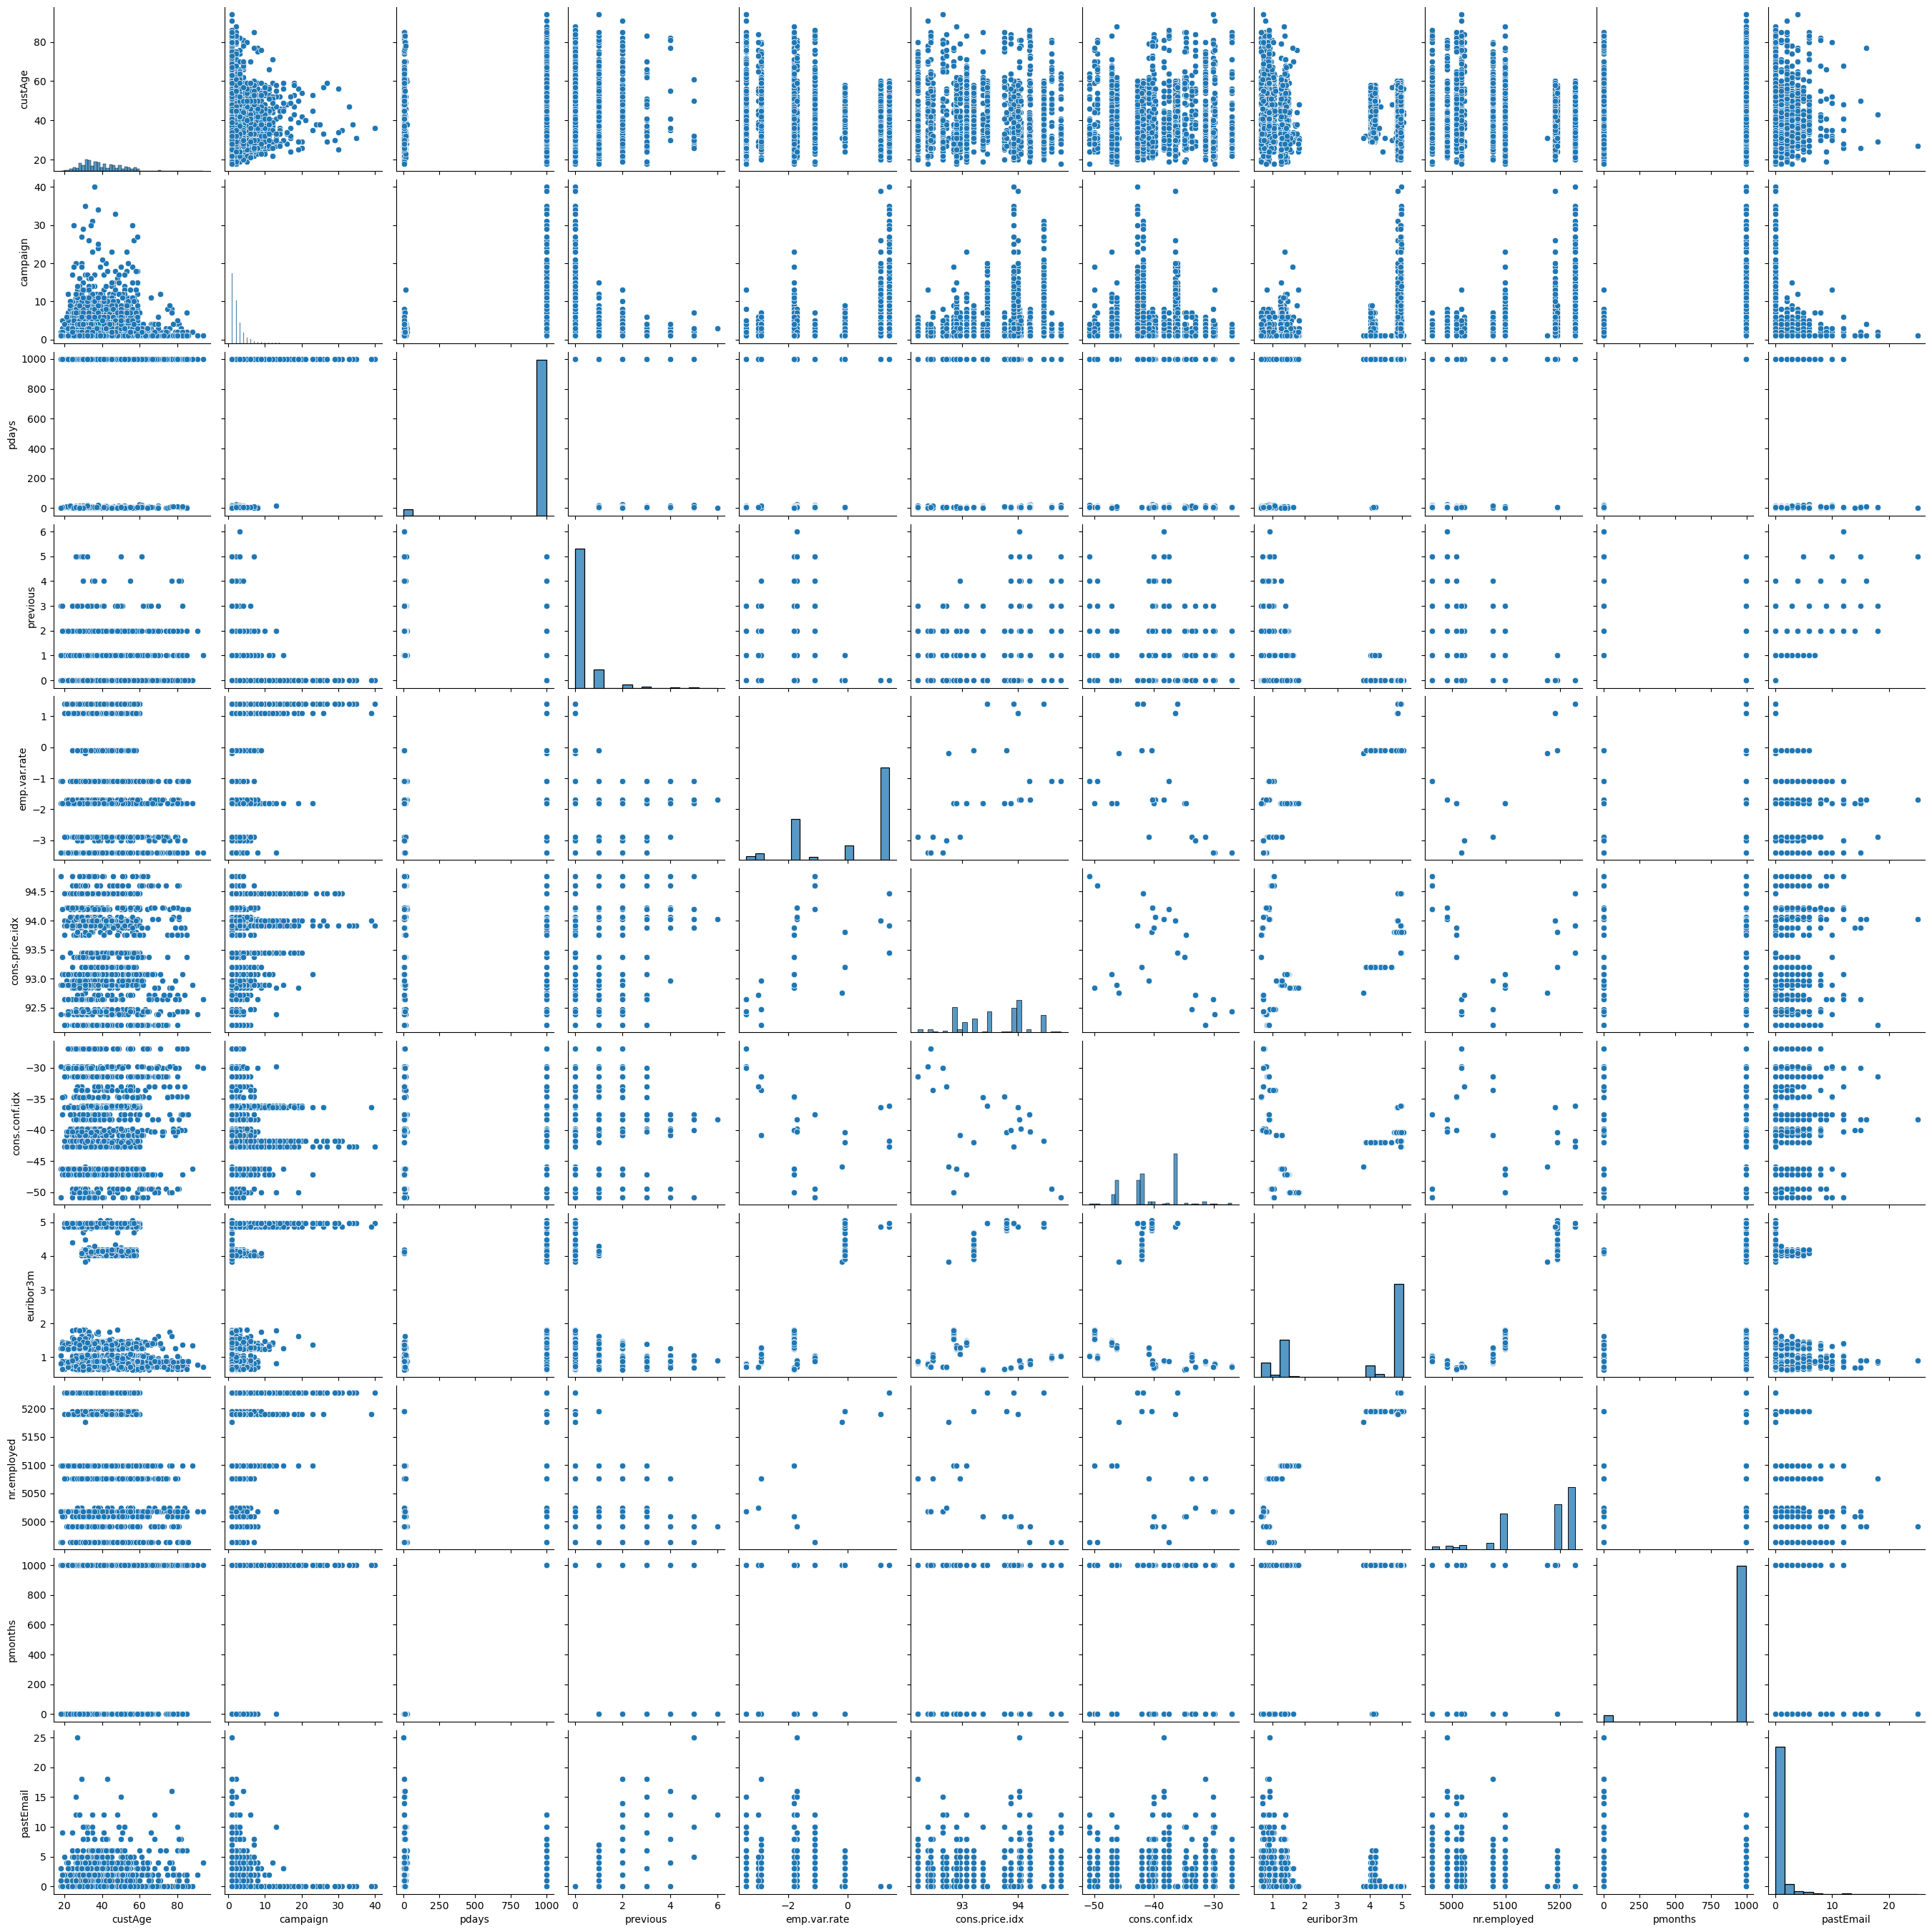

In [41]:
sns.pairplot(train_dataset)

# Save the plot as PNG file
plt.savefig('23.pairplot.png')
plt.show()

There is no significant inference obtained from the above pairplots between the features in the dataset.

# Data Cleaning

## Dealing with Imbalanced data

### Null value Treatment

This might include standardization, handling the missing values and outliers in the data
This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.

In [42]:
# Check for missing values
missing_values = train_dataset.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
custAge           2014
profession           0
marital              0
schooling         2406
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        787
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64


There are null values in 'custAge','schooling' and 'day_of_week' features.

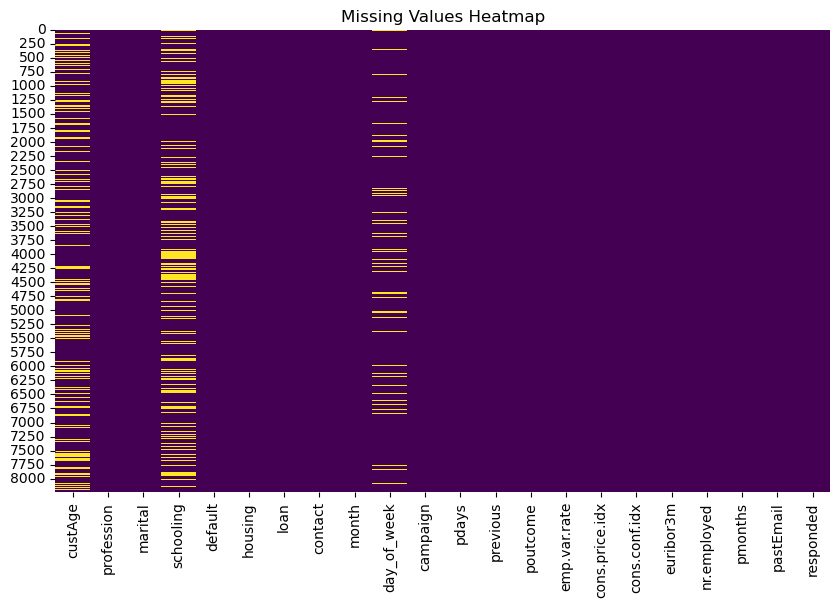

<Figure size 640x480 with 0 Axes>

In [43]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_dataset.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Save the plot as PNG file
plt.savefig('24.Missing Values Heatmap.png')
plt.show()

Only 3 columns have missing values

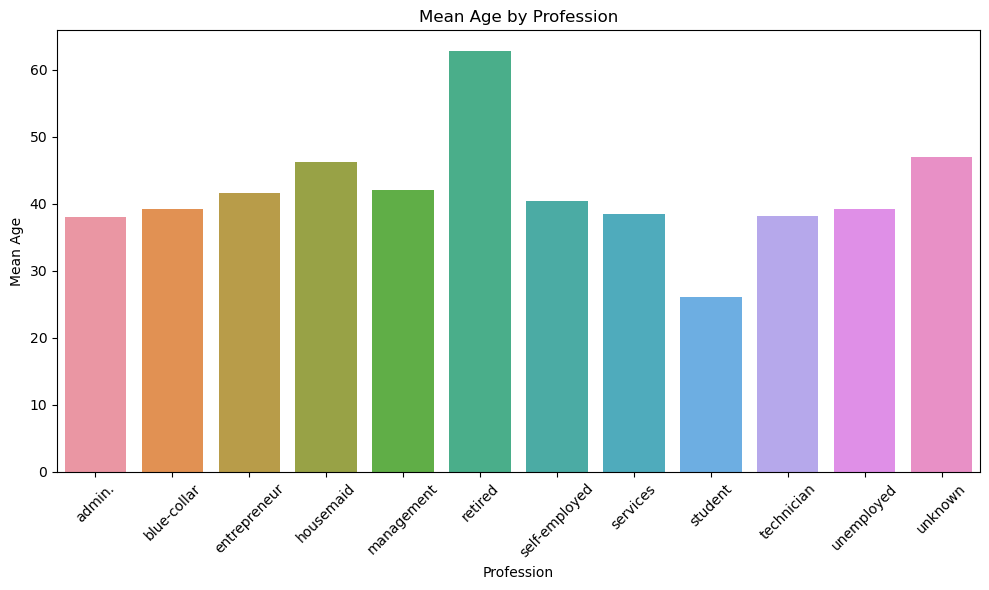

In [44]:
# Impute the missing values in age feature based on the profession done by the customers
# Calculate mean age for each profession

mean_age_by_profession = train_dataset.groupby('profession')['custAge'].mean()

# Plot median age for each profession
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_age_by_profession.index, y=mean_age_by_profession.values)
plt.xlabel('Profession')
plt.ylabel('Mean Age')
plt.title('Mean Age by Profession')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as PNG file
plt.savefig('25.Mean_Age_by_Profession.png')
plt.show()


In [45]:
# Impute null values in 'custAge' based on mean age for each profession

for profession,mean_age in mean_age_by_profession.items():
    train_dataset.loc[(train_dataset['profession'] == profession) & (train_dataset['custAge'].isnull()), 'custAge'] = mean_age

In [46]:
# Mode imputation for categorical column 'day_of_week'

missing_cat_column = ['day_of_week']
mode_imputer = SimpleImputer(strategy='most_frequent')
train_dataset[missing_cat_column] = mode_imputer.fit_transform(train_dataset[missing_cat_column])

In [47]:
# Impute null values in 'schooling' based on the customer profession

schooling_by_profession = train_dataset.groupby('profession')['schooling'].agg(lambda x: x.mode())

# Print the result
print(schooling_by_profession)

profession
admin.             university.degree
blue-collar                 basic.9y
entrepreneur       university.degree
housemaid                   basic.4y
management         university.degree
retired                     basic.4y
self-employed      university.degree
services                 high.school
student                  high.school
technician       professional.course
unemployed               high.school
unknown                      unknown
Name: schooling, dtype: object


As education level and profession are highly correlated with each other,found the most common schooling for the particular profession.

In [48]:
# Impute null values in 'schooling' column with mode value based on 'profession'.

for profession, mode_value in schooling_by_profession.items():
    train_dataset.loc[(train_dataset['profession'] == profession) & (train_dataset['schooling'].isnull()), 'schooling'] = mode_value

In [49]:
# Re-check for null values in the dataset after imputations

train_dataset.isnull().sum()/len(train_dataset)*100

custAge           0.0
profession        0.0
marital           0.0
schooling         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
pmonths           0.0
pastEmail         0.0
responded         0.0
dtype: float64

Thus all the null values are successfully imputed.

### Remove Duplicates

In [52]:
# Checking for duplicates

num_duplicates = train_dataset.duplicated().sum()
num_duplicates

0

In [53]:
# Removing the duplicate records

train_dataset.drop_duplicates(inplace=True)

# Shape of the dataset after removing the duplicates
train_dataset.shape

(8174, 22)

### Feature Engineering

In [54]:
# Making a copy for the training dataset as we do not want change the original dataset.

train_dataset_upd = train_dataset.copy()

In [55]:
# Encoding the target variable for class 0 and class 1

train_dataset_upd['responded'] = train_dataset_upd['responded'].map(lambda x: 0 if x == 'no' else 1)

### Correlation Matrix

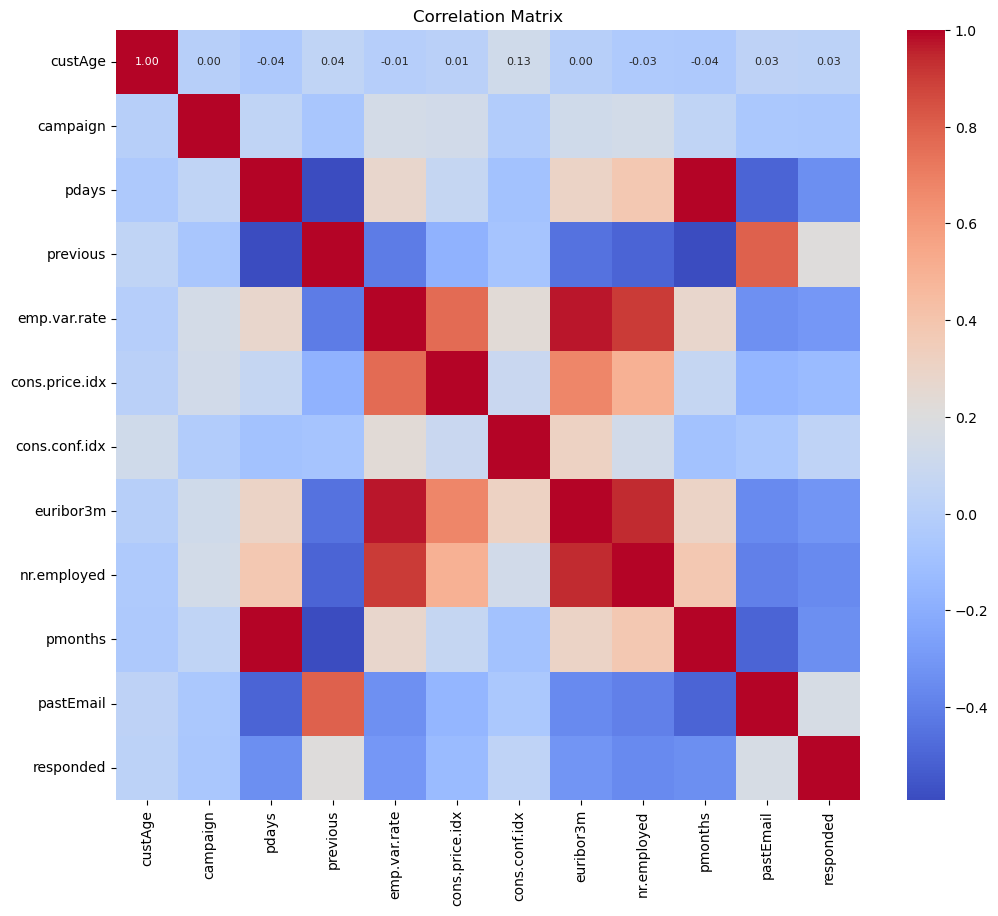

In [56]:
# Find the correlation between the numerical features
plt.figure(figsize=(12,10))
cols = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
        'euribor3m', 'nr.employed', 'pmonths', 'pastEmail','responded']
cor = train_dataset_upd[cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":8})
plt.title('Correlation Matrix')

# Save the plot as PNG file
plt.savefig('26.correlation_matrix.png')
plt.show()

From the above correlation matrix,features like employment rate,number of employees,euribor 3 month rate are highly correlated with the target variable 'responded'.The feature 'pmonths' is highly correlated with the 'pdays' feature.So further analysis are done on both the features below.

In [57]:
# Check for correlation between the features with the target variable

source_corr = cor[['responded']].sort_values(by='responded',ascending=True)
source_corr

,responded
nr.employed,-0.358632
pmonths,-0.338311
pdays,-0.338257
euribor3m,-0.313982
emp.var.rate,-0.302553
cons.price.idx,-0.133232
campaign,-0.062545
custAge,0.028555
cons.conf.idx,0.037616
pastEmail,0.164044


In [58]:
freq_pdays = train_dataset_upd['pdays'].value_counts()
print(freq_pdays)

pdays
999.0    7858
6.0        90
3.0        86
4.0        25
9.0        17
7.0        16
2.0        13
12.0       12
10.0        8
5.0         7
13.0        6
14.0        6
15.0        5
11.0        5
16.0        4
1.0         4
0.0         3
8.0         3
17.0        2
19.0        1
25.0        1
21.0        1
22.0        1
Name: count, dtype: int64


In [59]:
freq_pmonths = train_dataset_upd['pmonths'].value_counts()
print(freq_pmonths)

pmonths
999.000000    7858
0.200000        90
0.100000        86
0.133333        25
0.300000        17
0.233333        16
0.066667        13
0.400000        12
0.333333         8
0.166667         7
0.433333         6
0.466667         6
0.500000         5
0.366667         5
0.533333         4
0.033333         4
0.000000         3
0.266667         3
0.566667         2
0.633333         1
0.833333         1
0.700000         1
0.733333         1
Name: count, dtype: int64


From the above data we can understand that 'pmonths' essentially represents the duration indicated by 'pdays' in terms of months. For instance, if 'pdays' equals 6, then 'pmonths' equals 6/30, which equals 0.2. As both features convey the same temporal information,dropping the 'pmonths' column.

In [60]:
train_dataset_upd.drop('pmonths',axis=1,inplace=True)

# labelling the pdays feature
conditions_pdays = [
        (train_dataset_upd['pdays'] == 999),
        (train_dataset_upd['pdays'] < 5),
        ((train_dataset_upd['pdays'] >= 5) & (train_dataset_upd['pdays'] <= 10)),
        ((train_dataset_upd['pdays'] > 10) & (train_dataset_upd['pdays'] != 999)) ]

choices_pdays = ['not_contacted', 'less_than_5_days', '5_to_10 days', 'greater_than_10_days']

# Create the 'pdays' column based on conditions
train_dataset_upd['pdays'] = np.select(conditions_pdays, choices_pdays, default='unknown')
train_dataset_upd['pdays'].value_counts()

pdays
not_contacted           7858
5_to_10 days             141
less_than_5_days         131
greater_than_10_days      44
Name: count, dtype: int64

In [61]:
# Labelling the feature 'pastEmail' according to the values present in it.

sorted_unique_values = np.sort(train_dataset_upd['pastEmail'].unique())
# Define conditions and choices for pastEmail
conditions_pastEmail = [
        (train_dataset_upd['pastEmail'] == 0),
        (train_dataset_upd['pastEmail'] < 10),
        (train_dataset_upd['pastEmail'] >= 10) ]

choices_pastEmail = ['no_email_sent', 'less_than_10', 'more_than_10']

# Create the 'pastEmail_category' column based on conditions
train_dataset_upd['pastEmail'] = np.select(conditions_pastEmail, choices_pastEmail, default='unknown')
train_dataset_upd['pastEmail'].value_counts()

pastEmail
no_email_sent    7156
less_than_10      990
more_than_10       28
Name: count, dtype: int64

In [62]:
# Labelling the feature 'custAge' according to the values present in it.

sorted_unique_values = np.sort(train_dataset_upd['custAge'].unique())
# Define conditions and choices for custAge
conditions_custAge = [
         (train_dataset_upd['custAge'] <= 30),
         ((train_dataset_upd['custAge'] > 30) & (train_dataset_upd['custAge'] <= 45)),
         ((train_dataset_upd['custAge'] > 45) & (train_dataset_upd['custAge'] <= 60)),
         ((train_dataset_upd['custAge'] > 60) & (train_dataset_upd['custAge'] <= 75)),
         (train_dataset_upd['custAge'] > 75) ]


choices_custAge = ['below_30', '30-45', '45-60','60-75','above_75']

# Create the 'pastEmail_category' column based on conditions
train_dataset_upd['custAge'] = np.select(conditions_custAge, choices_custAge, default='unknown')
train_dataset_upd['custAge'].value_counts()

custAge
30-45       5078
45-60       1681
below_30    1183
60-75        181
above_75      51
Name: count, dtype: int64

### Identifying numerical,categorical and binary features

In [63]:
# Finding the numerical features in the dataset
numerical_columns = train_dataset_upd._get_numeric_data().columns

In [64]:
# Find the categorical features in the dataset
categorical_columns = train_dataset_upd.drop(numerical_columns,axis=1).columns

In [65]:
# Identify the binary columns
def binary_columns(dataset):
    binary_cols = []
    for i in dataset.select_dtypes(include=['int', 'float']).columns:
        unique_values = dataset[i].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(i)
    return binary_cols

binary_cols = binary_columns(train_dataset_upd)
numerical_columns = [i for i in numerical_columns if i not in binary_cols]

In [66]:
print(numerical_columns)
print()
print(categorical_columns)
print()
print(binary_cols)

['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'pdays', 'poutcome',
       'pastEmail'],
      dtype='object')

['responded']


## Outliers Plot

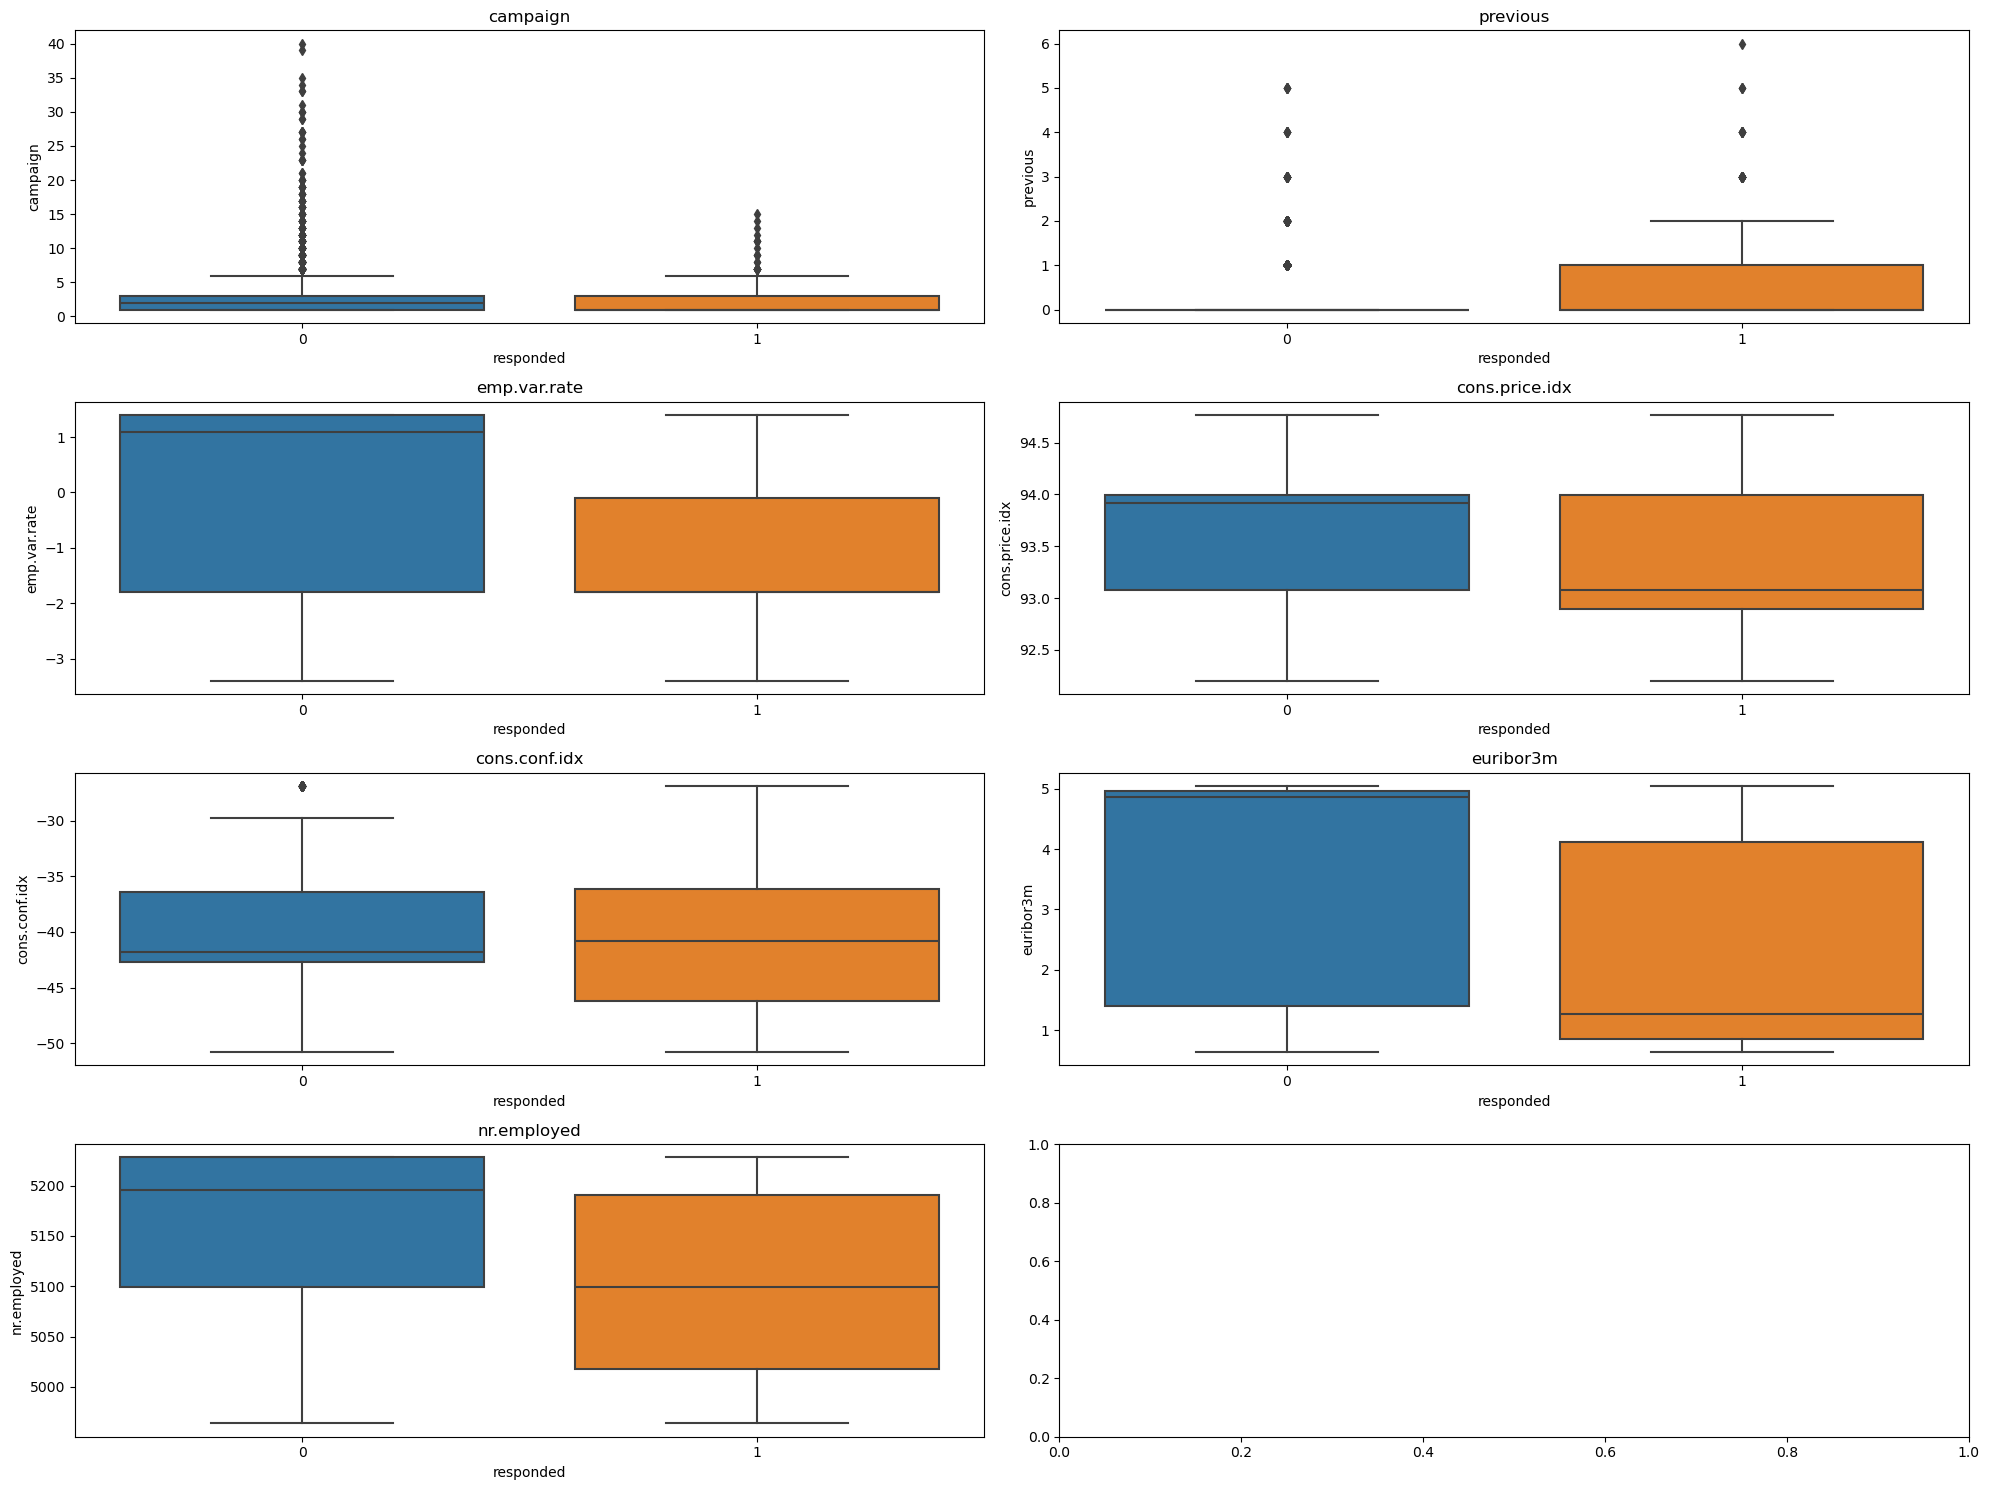

In [67]:
# Boxplot for the numerical features

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
    
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=train_dataset_upd,x = 'responded',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
plt.tight_layout()

# Save the plot as PNG file
plt.savefig('27.Outliers.png')
plt.show()

From the above boxplots,we could find outliers present in the features 'campaign'.

### Skewness of the features

In [68]:
# Find the skewness of the numerical features

skewness = train_dataset[numerical_columns].skew()
print(skewness)

campaign          4.812034
previous          3.822065
emp.var.rate     -0.668240
cons.price.idx   -0.184092
cons.conf.idx     0.296747
euribor3m        -0.654088
nr.employed      -1.012087
dtype: float64


In [69]:
# Find columns with positive skewness
positive_skew_cols = skewness[skewness > 1].index.tolist()
print(positive_skew_cols)
    
# Apply log transformation to columns with positive skewness
for col in positive_skew_cols:
    train_dataset_upd[col] = np.log1p(train_dataset_upd[col])

['campaign', 'previous']


In [70]:
for i in numerical_columns:
    print(f'The skewness of the feature {i}: {train_dataset_upd[i].skew()}')

The skewness of the feature campaign: 1.3550847784885267
The skewness of the feature previous: 2.5138501456316944
The skewness of the feature emp.var.rate: -0.6682396652752055
The skewness of the feature cons.price.idx: -0.18409162539049945
The skewness of the feature cons.conf.idx: 0.29674659225392386
The skewness of the feature euribor3m: -0.6540881670870189
The skewness of the feature nr.employed: -1.0120868801209453


## Feature Scaling and encoding

In [71]:
# Initialize LabelEncoder

label_encoder = LabelEncoder()
# Specify the features that needs to be label encoded
cat_cols1 = ['profession','schooling', 'month', 'day_of_week']
for col in cat_cols1:
    train_dataset_upd[col] = label_encoder.fit_transform(train_dataset_upd[col])
    
# Specify the features that needs to be one hot encoded 
cat_cols2 = ['custAge','marital', 'default', 'housing', 'loan','contact', 'poutcome','pdays','pastEmail']

# Use pd.get_dummies() to one-hot encode the categorical columns
encoded_features = pd.get_dummies(train_dataset_upd[cat_cols2])

# Concatenate the original DataFrame with the encoded features along the columns axis
train_dataset_upd = pd.concat([train_dataset_upd, encoded_features], axis=1)

# Drop the original categorical columns if needed
train_dataset_upd.drop(cat_cols2, axis=1, inplace=True) 

In [72]:
# Scale the numerical columns of the DataFrame using StandardScaler.
def feature_scaling(train_dataset_upd, numerical_columns):
    
# Initialize the StandardScaler
    sc_x = StandardScaler()
    train_dataset_upd[numerical_columns] = sc_x.fit_transform(train_dataset_upd[numerical_columns])
    return train_dataset_upd

final_train_dataset = feature_scaling(train_dataset_upd, numerical_columns)

In [75]:
# Print the final encoded and scaled train dataset

# Set the display option to show all column
pd.set_option('display.max_columns', None)
final_train_dataset.head()

,profession,schooling,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded,custAge_30-45,custAge_45-60,custAge_60-75,custAge_above_75,custAge_below_30,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_5_to_10 days,pdays_greater_than_10_days,pdays_less_than_5_days,pdays_not_contacted,pastEmail_less_than_10,pastEmail_more_than_10,pastEmail_no_email_sent
0,0,6,0,4,-0.033623,-0.392472,-1.179916,-0.855019,-1.399155,-1.193438,-0.909097,0,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True
1,7,3,3,2,5.080527,-0.392472,0.860548,0.599221,-0.454155,0.795335,0.862829,0,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2,0,3,4,1,-0.868104,-0.392472,0.860548,1.542838,-0.260859,0.791323,0.862829,0,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True
3,0,6,3,3,-0.033623,-0.392472,0.860548,0.599221,-0.454155,0.791896,0.862829,0,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
4,1,2,3,3,1.710189,-0.392472,0.860548,0.599221,-0.454155,0.791323,0.862829,0,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True


### Selection of Models

In [76]:
# Define the classifiers

# Libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers ={'Logistic_Regression':LogisticRegression(),
               'K_Neighbors':KNeighborsClassifier(),
              'Support Vector Classifier': SVC(),
              'RandomForest_Classifier':RandomForestClassifier(n_jobs=-1),
              'Gradient_Boosting':GradientBoostingClassifier()
               }

### Splitting data

In [77]:
# Split the dataset into features and target

X_original = final_train_dataset.drop('responded',axis= 1)
y_original = final_train_dataset['responded']

In [78]:
from sklearn.model_selection import train_test_split

X_train_original,X_test_original,y_train_original,y_test_original = train_test_split \
                                (X_original,y_original,test_size=0.2,random_state=42,stratify=y_original)

In [79]:
print(X_train_original.shape)
print(X_test_original.shape)
print(y_train_original.shape)
print(y_test_original.shape)

(6539, 41)
(1635, 41)
(6539,)
(1635,)


In [80]:
# Create an empty dataframe to store scores for various algorithms
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,RocCurveDisplay, log_loss
 
score_card = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
score_card1 = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])

# Update the result table for all the scores
# Performance measure considered for model comparison are AUC score,Precision,Recall,Accuracy,F1-score.
# Compile the required information in a user defined function
def update_score_card(model,accuracy,recall,precision,AUC_score,f1):
    global score_card
    new_score_card = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    # append the results to the dataframe
    score_card = pd.concat([score_card,new_score_card],ignore_index=True)
    
def update_score_card1(model,accuracy,recall,precision,AUC_score,f1):
    global score_card1
    new_score_card1 = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    # append the results to the dataframe
    score_card1 = pd.concat([score_card1,new_score_card1],ignore_index=True)
    

### Cross-validation of different Classifiers for original dataset without resampling

In [81]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 5  # Or any other desired value

for key, clf in classifiers.items():
    # Perform stratified cross-validation
    cv_scores = cross_val_score(clf, X_train_original,y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24))
    average_accuracy = np.mean(cv_scores)
    
    # Perform stratified cross-validation for recall
    cv_scores_recall = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24),scoring='recall')
    avg_recall = np.mean(cv_scores_recall)
    
    # Perform stratified cross-validation for precision
    cv_scores_precision = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='precision')
    avg_precision = np.mean(cv_scores_precision)
    
    # Perform stratified cross-validation for F1-score
    cv_scores_f1 = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='f1')
    avg_f1 = np.mean(cv_scores_f1)
    
    # Perform stratified cross-validation for ROC AUC
    cv_scores_roc_auc = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='roc_auc')
    avg_roc_auc = np.mean(cv_scores_roc_auc)
    
    key = key +'+ Original_dataset'
    update_score_card1(key,average_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)

score_card1




,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ Original_dataset,0.898608,0.215618,0.668527,0.780783,0.324572
1,K_Neighbors+ Original_dataset,0.885761,0.211582,0.490425,0.686662,0.293920
2,Support Vector Classifier+ Original_dataset,0.897537,0.190005,0.680654,0.699041,0.295641
3,RandomForest_Classifier+ Original_dataset,0.893102,0.288364,0.557585,0.753972,0.375339
4,Gradient_Boosting+ Original_dataset,0.897997,0.260013,0.620054,0.797292,0.363133


Although all the classfiers give better accuracy,since the data is highly imbalanced we need to introduce resampling before training the model.These models give poor Recall,Precision score as the model is trained on imbalanced dataset.

In [82]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Cross-validation and performance metrics of different Classifiers after SMOTE

In [83]:
from imblearn.over_sampling import SMOTE

# Perform cross-validation with SMOTE technique
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
smote = SMOTE()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = smote.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ SMOTE'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)
score_card

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.887751,0.331544,0.512478,0.645244,0.401896
1,K_Neighbors+ SMOTE,0.805324,0.468982,0.283881,0.658675,0.353198
2,Support Vector Classifier+ SMOTE,0.881175,0.389443,0.473092,0.666777,0.426723
3,RandomForest_Classifier+ SMOTE,0.883315,0.358416,0.480488,0.654454,0.410083
4,Gradient_Boosting+ SMOTE,0.889433,0.370551,0.519917,0.663196,0.431774


After applying the SMOTE technique to balance the data, both precision and recall scores have shown significant improvement compared to the metrics obtained from the original dataset without resampling methods.

### Cross-validation and performance metrics of different Classifiers after Random Undersampler

In [84]:
from imblearn.under_sampling import RandomUnderSampler

# Perform cross-validation with random undersampling
undersampler = RandomUnderSampler()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = undersampler.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ Undersampler'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)
score_card

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.887751,0.331544,0.512478,0.645244,0.401896
1,K_Neighbors+ SMOTE,0.805324,0.468982,0.283881,0.658675,0.353198
2,Support Vector Classifier+ SMOTE,0.881175,0.389443,0.473092,0.666777,0.426723
3,RandomForest_Classifier+ SMOTE,0.883315,0.358416,0.480488,0.654454,0.410083
4,Gradient_Boosting+ SMOTE,0.889433,0.370551,0.519917,0.663196,0.431774
5,Logistic_Regression+ Undersampler,0.789112,0.664402,0.304572,0.734737,0.417357
6,K_Neighbors+ Undersampler,0.708517,0.640123,0.224868,0.678697,0.332757
7,Support Vector Classifier+ Undersampler,0.748895,0.695375,0.267716,0.725556,0.386350
8,RandomForest_Classifier+ Undersampler,0.759446,0.659060,0.270506,0.715679,0.383555
9,Gradient_Boosting+ Undersampler,0.777646,0.662997,0.291315,0.727654,0.404180


After employing the Undersampling technique to balance the data, while recall scores have demonstrated considerable enhancement, the accuracy and precision has experienced a notable decline, falling below the threshold of 0.85, which serves as the success metric.

### Cross-validation and performance metrics of different Classifiers after Random Oversampler

In [85]:
from imblearn.over_sampling import RandomOverSampler

# Perform cross-validation with random oversampling
oversampler = RandomOverSampler()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = oversampler.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ Oversampler'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)


In [86]:
score_card.style.highlight_max(color = 'pink', axis = 0)

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.887751,0.331544,0.512478,0.645244,0.401896
1,K_Neighbors+ SMOTE,0.805324,0.468982,0.283881,0.658675,0.353198
2,Support Vector Classifier+ SMOTE,0.881175,0.389443,0.473092,0.666777,0.426723
3,RandomForest_Classifier+ SMOTE,0.883315,0.358416,0.480488,0.654454,0.410083
4,Gradient_Boosting+ SMOTE,0.889433,0.370551,0.519917,0.663196,0.431774
5,Logistic_Regression+ Undersampler,0.789112,0.664402,0.304572,0.734737,0.417357
6,K_Neighbors+ Undersampler,0.708517,0.640123,0.224868,0.678697,0.332757
7,Support Vector Classifier+ Undersampler,0.748895,0.695375,0.267716,0.725556,0.386350
8,RandomForest_Classifier+ Undersampler,0.759446,0.659060,0.270506,0.715679,0.383555
9,Gradient_Boosting+ Undersampler,0.777646,0.662997,0.291315,0.727654,0.404180


The results indicate that the Gradient Boosting model consistently achieves higher accuracy,Precision,ROC AUC and F1 scores. Considering the highly imbalanced dataset,opted to proceed with the Gradient Boosting+SMOTE for further analysis and model refinement,as its accuracy is > 0.85 which serves as a success metric.

## Hyperparameter Tuning

In [87]:
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
pipeline = Pipeline([('smote', smote), ('gb_classifier', gb_classifier)])

# Define the parameter grid to search
parameters = {
    'gb_classifier__n_estimators': [100, 200, 300],
    'gb_classifier__learning_rate': [0.01, 0.1, 0.2],
    'gb_classifier__max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(pipeline, 
                           param_grid = parameters, 
                           cv=skf, 
                           scoring='f1', 
                           n_jobs=-1)
grid_search.fit(X_train_original, y_train_original)

best_est = grid_search.best_estimator_
best_model = grid_search.best_estimator_['gb_classifier']


print("Best parameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)
print("Best Model:",best_model)


Best parameters: {'gb_classifier__learning_rate': 0.01, 'gb_classifier__max_depth': 5, 'gb_classifier__n_estimators': 200}
Best f1 score: 0.46574842930784016
Best Model: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=42)


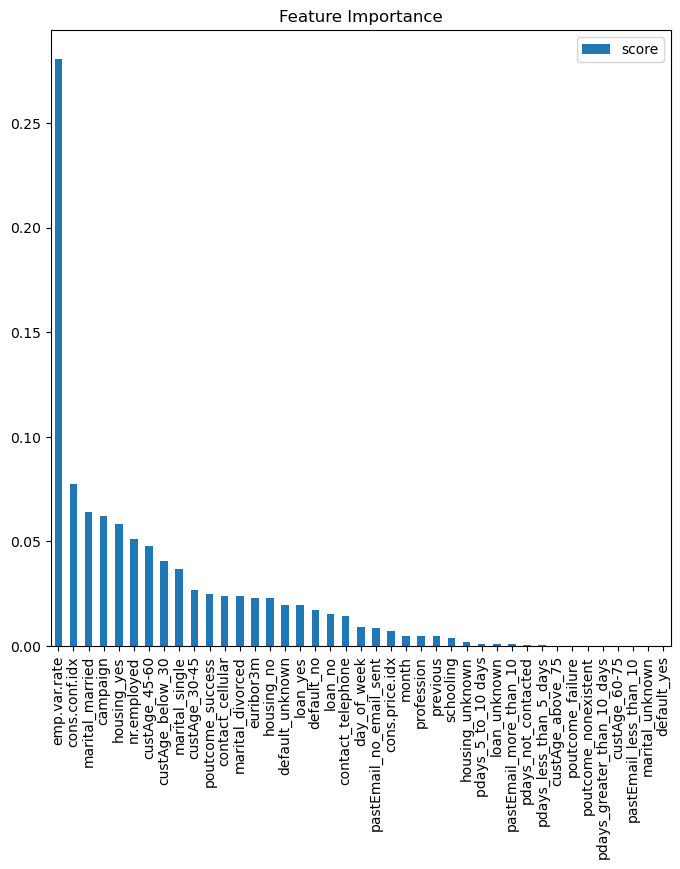

In [88]:
# Get feature importances
feature_importance = best_model.feature_importances_
features = X_test_original.columns
feature_importance_df = pd.DataFrame(data=feature_importance, index=features, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance_df.plot(kind = 'bar',figsize=(8,8))
plt.title('Feature Importance')

# Save the plot as PNG file
plt.savefig('28.Feature_importance.png')
plt.show()


In [89]:
# Predict for test data using the best model above
y_predictions = best_model.predict(X_test_original)

# Evaluate the gradient boosting model
accuracy = accuracy_score(y_test_original, y_predictions)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.867


Thus the accuracy > 0.85 is successfully achieved.

In [90]:
# Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]

# Classification Report
report = classification_report(y_test_original,y_predictions,target_names=target_names)
print(report)

              precision    recall  f1-score   support

 Negative(0)       0.93      0.92      0.92      1449
 Positive(1)       0.42      0.48      0.45       186

    accuracy                           0.87      1635
   macro avg       0.68      0.70      0.69      1635
weighted avg       0.87      0.87      0.87      1635



In [91]:
# Checking the accuracy on the testing dataset using confusion matrix
cm = confusion_matrix(y_test_original,y_predictions)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1327  122]
 [  96   90]]


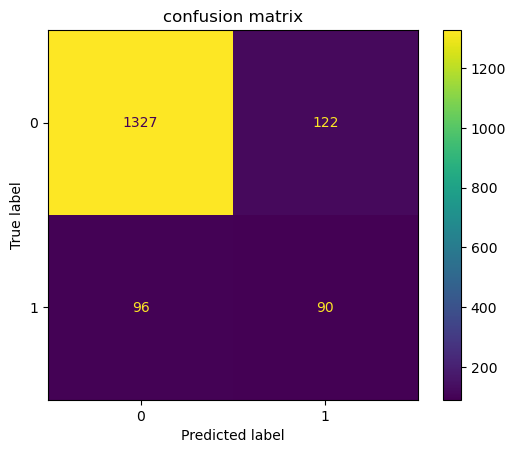

In [92]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
display.plot()

# Save the plot as PNG file
plt.savefig('29.confusion_matrix.png')
plt.title('confusion matrix')
plt.show()

In [93]:
# Display number of true positives, true negatives, false positives, and false negatives

print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 90
True Negatives: 1327
False Positives: 122
False Negatives: 96


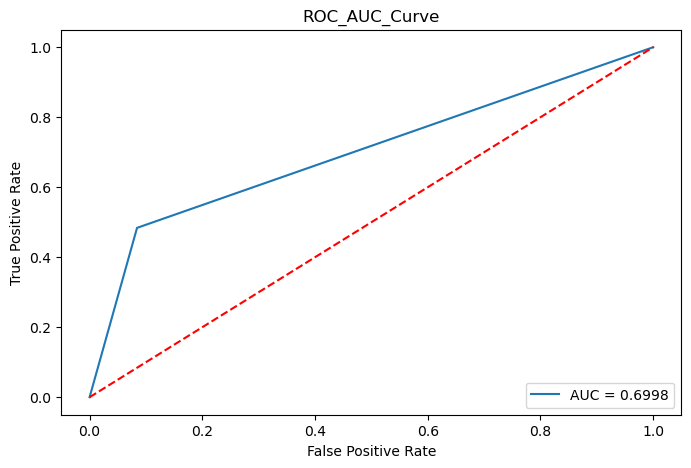

In [94]:
# Plot ROC curve
# Using ROC Curve we are checking the accuracy on the testing dataset
fpr, tpr, thresholds = roc_curve(y_test_original,y_predictions)
auc = round(roc_auc_score(y_test_original,y_predictions),4)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'AUC = {auc}')

# Add threshold line at 0.50
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Save the plot as PNG file
plt.savefig('30.ROC_AUC_Curve.png')
plt.title('ROC_AUC_Curve')
plt.show()

### Conclusion:
The accuracy of 0.87(>.85), which is our success metric is achieved with gradient boosting algorithm along with SMOTE technique. 

### Note:
To proceed further for the end-to-end implementation of the project, please refer to the 'Marketing_source_code_pipeline.ipynb' notebook, where the target for the test dataset was identified using the optimal machine learning model.

#### The next step is to apply this model to the test dataset to identify which potential customers should be targeted in the marketing campaign.

Steps: Load and Preprocess the Test Data: We need to ensure that the test data is preprocessed in the same way as the training data. This includes handling missing values, encoding categorical variables, and any other transformations that were applied.

**Make Predictions:** Use the tuned Gradient Boosting Classifier model to predict on the test dataset.

**Generate Output:** We'll create a column in the test dataset with the predictions (1 for 'yes, market to this individual', 0 for 'no, do not market').

**Consider Profit and Cost:** When deciding whether to market to an individual, consider the cost of marketing ($25 per customer) and the expected profit from customers

In [95]:
# Handling missing values: filling missing 'custAge' with median and 'schooling' with mode
test_dataset['custAge'].fillna(test_dataset['custAge'].median(), inplace=True)
test_dataset['schooling'].fillna(test_dataset['schooling'].mode()[0], inplace=True)

# One-hot encoding for categorical variables
categorical_cols = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']
test_dataset_encoded = pd.get_dummies(test_dataset, columns=categorical_cols)

# Dropping the 'id' column as it was not used in training
test_dataset_encoded.drop(['id'], axis=1, inplace=True)

# Checking the first few rows after preprocessing
test_dataset_encoded.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profession_admin.,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,profession_unknown,marital_divorced,marital_married,marital_single,marital_unknown,schooling_basic.4y,schooling_basic.6y,schooling_basic.9y,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,schooling_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,38.0,2,999,1,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
1,35.0,2,3,1,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
2,50.0,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
3,30.0,1,999,0,1.4,93.444,-36.1,4.964,5228.1,999.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,39.0,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


To align the features of the test dataset with those of the training dataset, we need to perform the following steps:

**Identify Missing Columns:** Determine which columns are present in the training dataset but missing in the test dataset. Add these columns to the test dataset, filling them with zeros.

**Remove Extra Columns:** Identify any columns in the test dataset that are not present in the training dataset. Remove these columns.

**Ensure Correct Order:** Make sure the order of columns in the test dataset matches the order in the training dataset.

In [96]:
# List of columns from the training dataset
train_columns = list(X_train_original.columns)

# Add missing columns in test dataset
for col in train_columns:
    if col not in test_dataset_encoded.columns:
        test_dataset_encoded[col] = 0

# Ensure the order of columns in test dataset matches that of the training dataset
test_dataset_encoded = test_dataset_encoded[train_columns]


In [97]:
train_columns

['profession',
 'schooling',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'custAge_30-45',
 'custAge_45-60',
 'custAge_60-75',
 'custAge_above_75',
 'custAge_below_30',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'pdays_5_to_10 days',
 'pdays_greater_than_10_days',
 'pdays_less_than_5_days',
 'pdays_not_contacted',
 'pastEmail_less_than_10',
 'pastEmail_more_than_10',
 'pastEmail_no_email_sent']

In [ ]:
# Remove columns in test dataset that are not in training dataset
test_dataset_encoded = test_dataset_encoded[train_columns]

In [100]:
# Making predictions on the test dataset
test_predictions = grid_search.predict(test_dataset_encoded)

# Adding the predictions to the original test dataset
test_dataset['Marketing_Response'] = test_predictions

# Checking the first few rows with the predictions
test_dataset.head(150)


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,Marketing_Response
0,38.0,admin.,married,university.degree,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1,0
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2,0
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3,0
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4,0
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,43.0,entrepreneur,single,university.degree,no,no,yes,cellular,jul,fri,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,146,0
146,34.0,admin.,single,university.degree,no,no,no,cellular,aug,thu,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,999.0,0,147,0
147,70.0,retired,married,university.degree,no,yes,no,cellular,may,thu,1,3,2,success,-1.8,93.876,-40.0,0.683,5008.7,0.1,0,148,0
148,50.0,management,married,university.degree,no,no,no,cellular,nov,thu,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,999.0,2,149,0


# Model Deployment

In [101]:
!pip install joblib


In [103]:
import joblib

# Save the tuned Gradient Booster Classifier model using joblib
joblib.dump(grid_search, 'grid_search_model.pkl')

['grid_search_model.pkl']

The model is now ready to use on any interface.

# Discussion of future work:

Code for predicting the target variable using the trained model should be separated, and deployed on a cloud platform (Example: AWS Sagemaker). The model can be deploy to predict on a real-time basis basis, or on a batch-transform basis, depending on the business needs. In our case, leads could be bundled together, and batch-transform could be used.
Code for training the model needs also needs to be deployed using CI-CD pipeline such that continuous improvement and model training is possible.

# How does this benefit the insurance companies:

Getting predictions about leads whether they will purchase or not can save the insurance company time
and money by:
1. Directing marketing efforts towards leads who are likely to purchase as per the predictions. This would
result in better acquisition of customers and drive revenue growth.
2. Saving marketing expense by not pursuing leads who are not likely to purchase as per the predictions.
3. Saving time (and therefore costs) by not pursuing leads who are not likely to purchase.

# Thank You

-----------------------------------------------------------------------------------------------END----------------------------------------------------------------------------------------